In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [687]:
user = pd.read_csv('/Users/joyopsvig/github/springboard/Unit26-TakeHomeChallenges/relax_challenge/takehome_users.csv', encoding='latin-1')
userengagement = pd.read_csv('/Users/joyopsvig/github/springboard/Unit26-TakeHomeChallenges/relax_challenge/takehome_user_engagement.csv', encoding='latin-1')

In [688]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [689]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [690]:
user.rename(columns={'object_id':'user_id'}, inplace=True)

In [691]:
userengagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [692]:
userengagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [693]:
userengagement['time_stamp'] = pd.to_datetime(userengagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [694]:
print(userengagement['time_stamp'].min())
print(userengagement['time_stamp'].max())

2012-05-31 08:20:06
2014-06-06 14:58:50


In [695]:
userengagement['wk'] = userengagement['time_stamp'].dt.week
df = userengagement.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name="frequency")

#pd of frequency more than 3
result = df[df.frequency >= 3]

#list of user ids with frequency more than 3
user_ids = result.user_id.tolist()

<ipython-input-695-28cd3852bff2>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  userengagement['wk'] = userengagement['time_stamp'].dt.week


In [696]:
df.head()

,wk,user_id,frequency
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1


In [697]:
result['adopted_user'] = 1

<ipython-input-697-efb9efab1603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['adopted_user'] = 1


In [698]:
result['user_id'].value_counts()

8068     52
8721     52
1769     52
11267    52
10602    52
         ..
9343      1
9580      1
10892     1
2626      1
10335     1
Name: user_id, Length: 1445, dtype: int64

In [699]:
result.drop_duplicates(subset=['user_id'], keep='first', inplace=True, ignore_index=False)

<ipython-input-699-79c96becfba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop_duplicates(subset=['user_id'], keep='first', inplace=True, ignore_index=False)


In [700]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 1 to 57021
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   wk            1445 non-null   int64
 1   user_id       1445 non-null   int64
 2   frequency     1445 non-null   int64
 3   adopted_user  1445 non-null   int64
dtypes: int64(4)
memory usage: 56.4 KB


In [701]:
user

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [702]:
merged = user.merge(result, on='user_id', how='left', indicator=True)

In [703]:
print(user.info())
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                  

In [704]:
merged.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,wk,frequency,adopted_user,_merge
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN,NaN,left_only
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,6.0,3.0,1.0,both
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN,NaN,left_only
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN,NaN,left_only
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN,NaN,left_only


In [705]:
merged = merged.drop(labels=['wk', 'frequency', '_merge'], axis=1)

In [706]:
merged['adopted_user'] = merged['adopted_user'].fillna(0)

In [707]:
merged.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [708]:
merged['adopted_user'].value_counts()

0.0    10555
1.0     1445
Name: adopted_user, dtype: int64

<AxesSubplot:>

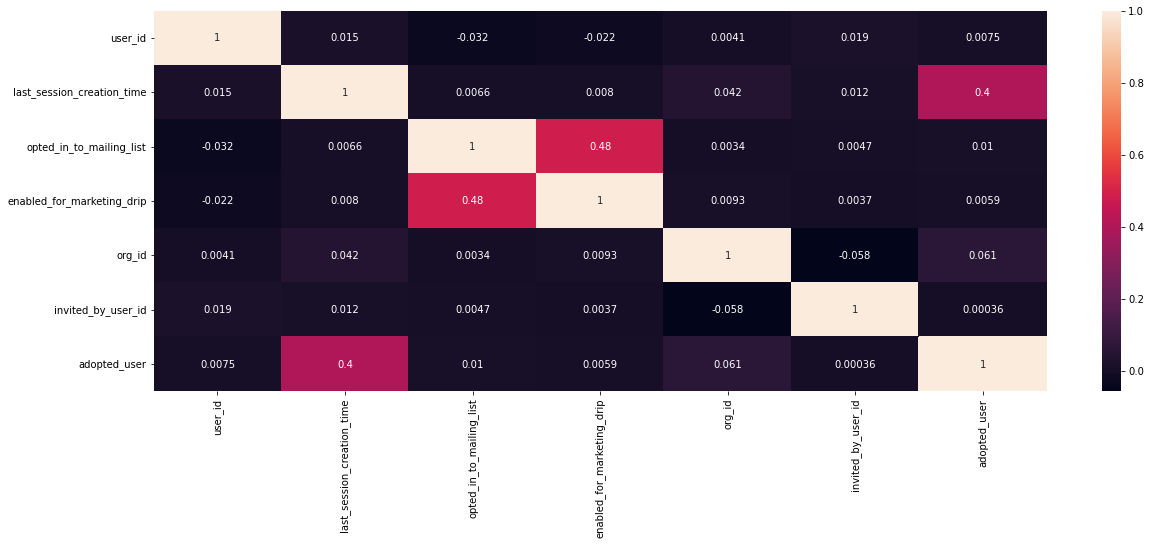

In [709]:
plt.figure(figsize=(20,7))
sns.heatmap(merged.corr(), annot=True)

<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

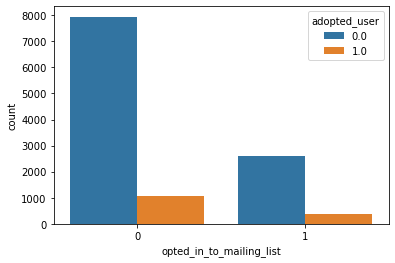

In [710]:
sns.countplot(x='opted_in_to_mailing_list',hue='adopted_user',data=merged)

<AxesSubplot:xlabel='creation_source', ylabel='count'>

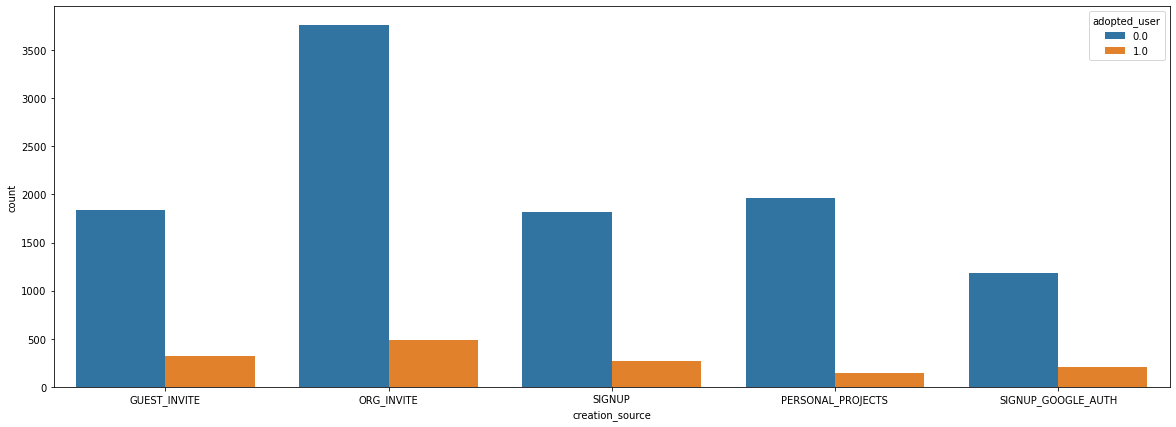

In [711]:
plt.figure(figsize=(20,7))
sns.countplot(x='creation_source',hue='adopted_user',data=merged)

In [712]:
merged.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_user'],
      dtype='object')

In [752]:
merged[merged['adopted_user'] == 1].describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,1445.000000,1.445000e+03,1445.000000,1445.000000,1445.000000,817.000000,1445.0
mean,6070.540484,1.397073e+09,0.261592,0.155017,162.229758,5966.110159,1.0
std,3495.859365,1.111488e+07,0.439654,0.362046,122.660302,3323.874072,0.0
min,2.000000,1.345699e+09,0.000000,0.000000,0.000000,29.000000,1.0
25%,3066.000000,1.400662e+09,0.000000,0.000000,52.000000,3096.000000,1.0
50%,6096.000000,1.401421e+09,0.000000,0.000000,141.000000,6028.000000,1.0
75%,9195.000000,1.401834e+09,1.000000,0.000000,265.000000,8679.000000,1.0
max,11988.000000,1.401926e+09,1.000000,1.000000,415.000000,11994.000000,1.0


In [753]:
merged[merged['adopted_user'] == 0].describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
count,10555.000000,7.378000e+03,10555.000000,10555.000000,10555.000000,5600.000000,10555.0
mean,5990.911322,1.375794e+09,0.247845,0.148555,139.099289,5962.497143,0.0
std,3459.952107,1.891663e+07,0.431782,0.355666,123.992883,3392.702928,0.0
min,1.000000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,0.0
25%,2988.500000,1.360101e+09,0.000000,0.000000,27.000000,3030.000000,0.0
50%,5995.000000,1.377996e+09,0.000000,0.000000,104.000000,5947.000000,0.0
75%,8980.500000,1.393248e+09,0.000000,0.000000,234.000000,8841.500000,0.0
max,12000.000000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,0.0


In [713]:
model_df = merged.drop(labels=['name', 'email', 'user_id', 'invited_by_user_id'], axis=1)

In [714]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   creation_source             12000 non-null  object 
 2   last_session_creation_time  8823 non-null   float64
 3   opted_in_to_mailing_list    12000 non-null  int64  
 4   enabled_for_marketing_drip  12000 non-null  int64  
 5   org_id                      12000 non-null  int64  
 6   adopted_user                12000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 750.0+ KB


In [715]:
model_df['creation_time'] = pd.to_datetime(model_df['creation_time'], format='%Y-%m-%d %H:%M:%S')

In [716]:
model_df['last_session_creation_time'] = pd.to_datetime(model_df['last_session_creation_time'], format='%Y-%m-%d %H:%M:%S')

In [717]:
model_df['creation_time']=model_df['creation_time'].dt.date 
model_df['last_session_creation_time']=model_df['last_session_creation_time'].dt.date 

In [718]:
model_df = model_df.drop(labels=['creation_time', 'last_session_creation_time', 'org_id'], axis=1)

In [719]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   adopted_user                12000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 468.8+ KB


In [720]:
model_df = model_df.replace(np.nan, 0)

In [721]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   adopted_user                12000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 468.8+ KB


In [722]:
model_df = pd.get_dummies(model_df)

In [723]:
model_df

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0.0,1,0,0,0,0
1,0,0,1.0,0,1,0,0,0
2,0,0,0.0,0,1,0,0,0
3,0,0,0.0,1,0,0,0,0
4,0,0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
11995,0,0,0.0,0,1,0,0,0
11996,0,0,0.0,0,0,0,0,1
11997,1,1,0.0,1,0,0,0,0
11998,0,0,0.0,0,0,1,0,0


In [745]:
X_train, X_test, y_train, y_test = train_test_split(model_df.drop('adopted_user',axis=1), 
                                                    model_df['adopted_user'], test_size=0.01, 
                                                    random_state=101)

In [746]:
model = RandomForestClassifier(max_depth=100, random_state=20)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

class_report = classification_report(y_test,predictions)
rsquared = model.score(X_test, y_test)

print(class_report)
print(rsquared)

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87        93
         1.0       0.00      0.00      0.00        27

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.60      0.78      0.68       120

0.775


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [739]:
set(y_test) - set(predictions)

{1.0}

In [731]:
model_df['adopted_user'].value_counts()

0.0    10555
1.0     1445
Name: adopted_user, dtype: int64

In [750]:
adoptionrate = 1445/10555
print(adoptionrate)

0.1369019422074846


In [734]:
model_df['adopted_user'].isnull().sum()

0

In [748]:
features = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
features

,importance
creation_source_PERSONAL_PROJECTS,0.433173
creation_source_GUEST_INVITE,0.166208
opted_in_to_mailing_list,0.095505
creation_source_SIGNUP_GOOGLE_AUTH,0.094224
creation_source_ORG_INVITE,0.077854
enabled_for_marketing_drip,0.072961
creation_source_SIGNUP,0.060075


**Summary of Findings**



Out of the 12,000 users, only 13% are considered to be adopted users. In reviewing the differences in summary statistics between adopted users vs not adopted users, adopted users have a slightly higher average than non adopted users when it comes up to opting in for the mailing list.

Adopted and non-adopted users had the highest number of invites coming from organizaiton invites.

Finally, I built a machine learning model to predict whether a user may be an adopted user or not. My model accurately predicted non-adopted users, but failed to work for predicting adopted users. However, by examining the feature importance for my random forest model I was able to see what the biggest indicator was for predicting a non-adopted user - which happens to be creating a profile for a personal project. This likely implies that those who create profiles for personal projects are not likely to be active/adopted users on the platform.